In [1]:
import sys
import os

root_path = os.path.abspath('.')
data_path = "data/train_pair_1w.json"
file_path = os.path.join(root_path, data_path)

assert os.path.exists(file_path)

In [2]:
# !pip install -U sentence-transformers

In [3]:
# jsonl 文件的读取方式
# https://blog.csdn.net/weixin_43420032/article/details/88547515
import json

def read_file(path):
    data = []
    with open(path, 'r') as f:
        for line in f.readlines():
            data.append(json.loads(line))

    return data
    

In [26]:
test_data = read_file(file_path)

In [28]:
test_data[:10]

[{'sentence1': '找一部小时候的动画片', 'sentence2': '求一部小时候的动画片。谢了', 'label': '1'},
 {'sentence1': '我不可能是一个有鉴赏能力的行家，小姐我把我的时间都花在书写上；象这样豪华的舞会，我还是头一次见到。',
  'sentence2': '蜡烛没熄就好了，夜黑得瘆人，情绪压抑。',
  'label': '0'},
 {'sentence1': '胡子长得太快怎么办？', 'sentence2': '胡子长得快怎么办？', 'label': '1'},
 {'sentence1': '有时，当空气所含的水蒸气已经饱和，拉托娜的女儿的光线被它留住而形成一个光环时，我们看到她就像这样被这个光环围绕着。',
  'sentence2': '木栅在波涛的冲击下猛烈地震动着。',
  'label': '0'},
 {'sentence1': '人家真要以为他们生平只看见过他这一个黑人呢。',
  'sentence2': '而且，当然，如果只有流血对他们才有帮助，他们是不会望而却步，停止流血的有的时候他们屠杀的全然是无辜的人，为保卫古老的法律而英勇牺牲了。',
  'label': '0'},
 {'sentence1': '在香港哪里买手表好', 'sentence2': '香港买手表哪里好', 'label': '1'},
 {'sentence1': '显然，她急于要向他说这么一句话。',
  'sentence2': '她像石像似的坐在那里，面色错黄、苍白，嘴唇紧抿着——什么都不吃。',
  'label': '0'},
 {'sentence1': '邓蒂斯仔细看了一番，然后又四面瞧来瞧去，寻找那件把它修削成这样整齐的形式的工具。',
  'sentence2': '三天以后，四个火枪手回到巴黎。',
  'label': '0'},
 {'sentence1': '别急呀，我的朋友。', 'sentence2': '你一定要看我一下。', 'label': '0'},
 {'sentence1': '全职妈妈在家怎么赚钱？', 'sentence2': '全职妈妈在家上网做什么工作赚钱', 'label': '1'}]

In [31]:
from sentence_transformers import SentenceTransformer

# 直接使用hugging face
# model = SentenceTransformer('moka-ai/m3e-base')

# 下载模型到本地，放在models目录下面
# model = SentenceTransformer('models/m3e')


/Users/pnightowl/confirm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([ 5.58739185e-01,  3.47888082e-01,  1.19115460e+00, -6.59837067e-01,
       -1.48600593e-01, -1.53650904e+00,  2.44386848e-02,  1.01766445e-01,
       -1.23195851e+00,  2.06010148e-01,  9.46821034e-01, -4.57516424e-02,
        6.73527777e-01, -4.23242211e-01, -9.85149562e-01, -1.44115493e-01,
        2.87530154e-01,  8.36716473e-01, -7.46326268e-01, -8.27828228e-01,
       -2.42760584e-01,  1.43773481e-01, -9.59243953e-01,  6.54832721e-01,
        3.98930572e-02,  3.13201211e-02, -2.34301135e-01,  3.53209406e-01,
        5.08721769e-01,  3.76312703e-01,  9.20948327e-01, -1.08260751e-01,
        1.11900568e-01, -7.57970214e-02, -1.16572849e-01, -2.25251749e-01,
        7.94435024e-01,  7.35297054e-02,  2.53166169e-01,  5.08690834e-01,
        7.88949311e-01,  7.86551237e-01, -8.71810973e-01, -4.27901268e-01,
       -4.41782689e-03,  2.75526494e-01,  4.18464929e-01,  1.52039587e-01,
       -1.35366857e+00, -5.96805215e-02,  5.81078589e-01,  5.36770630e+00,
       -4.41604823e-01,  

In [88]:
import time
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"函数 {func.__name__} 运行时间为：{end_time - start_time:.3f} 秒")
        return result
    return wrapper

def cos_similar(v1, v2):
    num = float(np.dot(v1, v2)) # 点乘

def label_to_bool(labels):
    bools = []
    for label in labels:
        if label == '0':
            bools.append(False)
        else:
            bools.append(True)
    return bools

@timer
def metrics(model, samples, sample_number=1000):
    sentence1, sentence2, labels = [], [], []
    samples = samples[:sample_number]
    for sample in samples:
        sentence1.append(sample['sentence1'])
        sentence2.append(sample['sentence2'])
        labels.append(sample['label'])

    # 0, 1 mapping to False, True
    bool_labels = label_to_bool(labels)

    s1_logit = model.encode(sentence1, batch_size=128, show_progress_bar=True, normalize_embeddings=True)
    s2_logit = model.encode(sentence2, batch_size=128, show_progress_bar=True, normalize_embeddings=True)

    # 这里直接做点乘，得到 每一对的内积
    inner_product = s1_logit * s2_logit
    # 推理的时候做了归一化的话，这一部就可以省略
    norm1 = np.linalg.norm(s1_logit, axis=1)
    norm2 = np.linalg.norm(s2_logit, axis=1)
    norm = norm1 * norm2

    similarity_score = np.sum(inner_product, axis=1) / norm
    
    threshold_search = np.arange(0.00, 1.05, 0.05)

    accuracy_table = []
    for threshold in threshold_search:
        match_result = similarity_score > threshold
        accuracy = np.sum(match_result == bool_labels)
        accuracy_table.append(round(accuracy/len(bool_labels),4)
    return accuracy_table
    

In [98]:
import torch
device_names = ['cpu']
model_names = ['models/m3e','models/bge']
n_sample = len(test_data)
accuracy_table = []


for device_name in device_names:
    for model_name in model_names:
        print(f"start to use {model_name} to infer on device {device_name}")
        device = torch.device(device_name)
        
        model = SentenceTransformer(model_name, device)
        accuracy_table.append(metrics(model, test_data, n_sample))

start to use models/m3e to infer on device mps


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [01:49<00:00,  1.39s/it]


(10000,)
函数 metrics 运行时间为：233.429 秒
start to use models/bge to infer on device mps


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [01:46<00:00,  1.35s/it]


(10000,)
函数 metrics 运行时间为：232.684 秒
start to use models/m3e to infer on device cpu


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [01:47<00:00,  1.36s/it]


(10000,)
函数 metrics 运行时间为：231.757 秒
start to use models/bge to infer on device cpu


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [01:45<00:00,  1.34s/it]

(10000,)
函数 metrics 运行时间为：230.379 秒


models/m3e, accuracy 0.8404, threshold 0.8
models/bge, accuracy 0.8511, threshold 0.65


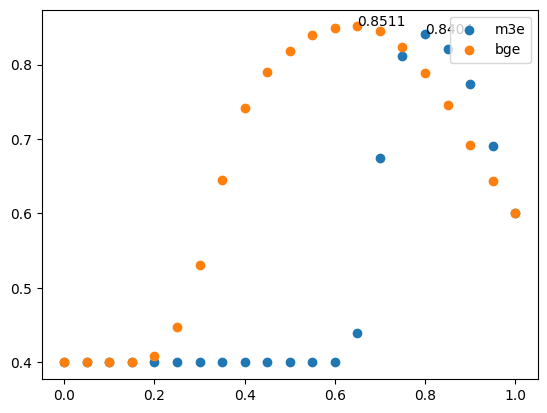

In [131]:
import matplotlib.pyplot as plt
thresholds = np.arange(0.00, 1.05, 0.05)
accuracy_table
labels = ['m3e','bge']
for i, accuracy in enumerate(accuracy_table[:len(model_names)]):
    accuracy = [float(a) for a in accuracy]
    idx = accuracy.index(max(accuracy))
    plt.scatter(thresholds, accuracy,label=labels[i])
    # plt.hlines(xmin=0, xmax=1, y=accuracy[idx]))
    # plt.vlines(ymin=0, ymax=1, x=thresholds[idx])
    plt.text(thresholds[idx], accuracy[idx]+0.001, accuracy[idx])
    print(f"{model_names[i]}, accuracy {max(accuracy)}, threshold {thresholds[idx]}")

plt.legend()
plt.show()
    

# 结论
- 就整体来看，bge-v1.5模型的效果要比m3e模型高出一个点，而且threshold的值也更加合理；bge-v1模型的threshold的也会偏高，调整之后下降到了一个比较合理的范围。
- 从推理时间上看两者的架构并没有对推理进行加速。

In [114]:
# 向量计算相似度 例子
import numpy as np
a = np.array([[1,2],
              [1,2]])

b = np.array([[1,3],
              [1,2]])
# 按行的点乘的结果，
c = np.sum(a * b, axis=1)


In [54]:
n1 = np.linalg.norm(a, axis=1)
n2 = np.linalg.norm(b, axis=1)

In [55]:
n1, n2

(array([2.23606798, 2.23606798]), array([3.16227766, 2.23606798]))

In [115]:
c / (n1 * n2)

array([0.98994949, 1.        ])